The dataset Air Quality contains the responses of a gas multisensor device deployed on the field in an Italian city. Hourly responses averages are recorded along with gas concentrations references from a certified analyzer.

Ground Truth hourly averaged concentrations for CO, Non Metanic Hydrocarbons, Benzene, Total Nitrogen Oxides (NOx) and Nitrogen Dioxide (NO2)

9358 instances and missing values are tagged with -200 value

In [37]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
air_quality = fetch_ucirepo(id=360) 
  
# data (as pandas dataframes) 
X = air_quality.data.features 
y = air_quality.data.targets 
  
# metadata 
print(air_quality.metadata) 
  
# variable information 
print(air_quality.variables) 


{'uci_id': 360, 'name': 'Air Quality', 'repository_url': 'https://archive.ics.uci.edu/dataset/360/air+quality', 'data_url': 'https://archive.ics.uci.edu/static/public/360/data.csv', 'abstract': 'Contains the responses of a gas multisensor device deployed on the field in an Italian city. Hourly responses averages are recorded along with gas concentrations references from a certified analyzer. ', 'area': 'Computer Science', 'tasks': ['Regression'], 'characteristics': ['Multivariate', 'Time-Series'], 'num_instances': 9358, 'num_features': 15, 'feature_types': ['Real'], 'demographics': [], 'target_col': None, 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 2008, 'last_updated': 'Sun Mar 10 2024', 'dataset_doi': '10.24432/C59K5F', 'creators': ['Saverio Vito'], 'intro_paper': {'ID': 420, 'type': 'NATIVE', 'title': 'On field calibration of an electronic nose for benzene estimation in an urban pollution monitoring scenario', 'authors': 

In [38]:
X

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,3/10/2004,18:00:00,2.6,1360,150,11.9,1046,166,1056,113,1692,1268,13.6,48.9,0.7578
1,3/10/2004,19:00:00,2.0,1292,112,9.4,955,103,1174,92,1559,972,13.3,47.7,0.7255
2,3/10/2004,20:00:00,2.2,1402,88,9.0,939,131,1140,114,1555,1074,11.9,54.0,0.7502
3,3/10/2004,21:00:00,2.2,1376,80,9.2,948,172,1092,122,1584,1203,11.0,60.0,0.7867
4,3/10/2004,22:00:00,1.6,1272,51,6.5,836,131,1205,116,1490,1110,11.2,59.6,0.7888
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9352,4/4/2005,10:00:00,3.1,1314,-200,13.5,1101,472,539,190,1374,1729,21.9,29.3,0.7568
9353,4/4/2005,11:00:00,2.4,1163,-200,11.4,1027,353,604,179,1264,1269,24.3,23.7,0.7119
9354,4/4/2005,12:00:00,2.4,1142,-200,12.4,1063,293,603,175,1241,1092,26.9,18.3,0.6406
9355,4/4/2005,13:00:00,2.1,1003,-200,9.5,961,235,702,156,1041,770,28.3,13.5,0.5139


In [39]:
X.columns

Index(['Date', 'Time', 'CO(GT)', 'PT08.S1(CO)', 'NMHC(GT)', 'C6H6(GT)',
       'PT08.S2(NMHC)', 'NOx(GT)', 'PT08.S3(NOx)', 'NO2(GT)', 'PT08.S4(NO2)',
       'PT08.S5(O3)', 'T', 'RH', 'AH'],
      dtype='object')

In [40]:
X.describe

<bound method NDFrame.describe of            Date      Time  CO(GT)  PT08.S1(CO)  NMHC(GT)  C6H6(GT)  \
0     3/10/2004  18:00:00     2.6         1360       150      11.9   
1     3/10/2004  19:00:00     2.0         1292       112       9.4   
2     3/10/2004  20:00:00     2.2         1402        88       9.0   
3     3/10/2004  21:00:00     2.2         1376        80       9.2   
4     3/10/2004  22:00:00     1.6         1272        51       6.5   
...         ...       ...     ...          ...       ...       ...   
9352   4/4/2005  10:00:00     3.1         1314      -200      13.5   
9353   4/4/2005  11:00:00     2.4         1163      -200      11.4   
9354   4/4/2005  12:00:00     2.4         1142      -200      12.4   
9355   4/4/2005  13:00:00     2.1         1003      -200       9.5   
9356   4/4/2005  14:00:00     2.2         1071      -200      11.9   

      PT08.S2(NMHC)  NOx(GT)  PT08.S3(NOx)  NO2(GT)  PT08.S4(NO2)  \
0              1046      166          1056      113     

In [41]:
X.isnull().sum()

Date             0
Time             0
CO(GT)           0
PT08.S1(CO)      0
NMHC(GT)         0
C6H6(GT)         0
PT08.S2(NMHC)    0
NOx(GT)          0
PT08.S3(NOx)     0
NO2(GT)          0
PT08.S4(NO2)     0
PT08.S5(O3)      0
T                0
RH               0
AH               0
dtype: int64

In [42]:
X_no_missing = X[~(X == -200).any(axis=1)]
X_no_missing.shape

(827, 15)

In [43]:
specific_columns = ['CO(GT)', 'NOx(GT)', 'NO2(GT)', 'NMHC(GT)', 'C6H6(GT)']
X_no_missing_2 = X[~X[specific_columns].isin([-200]).any(axis=1)]
X_no_missing_2.shape

(827, 15)

In [44]:
# Count -200 values in each column
missing_counts = (X == -200).sum()
print("\nCount of -200 values in each column:")
print(missing_counts)

# Show percentage of -200 values in each column
missing_percentage = (X == -200).mean() * 100
print("\nPercentage of -200 values in each column:")
print(missing_percentage.round(2), '%')


Count of -200 values in each column:
Date                0
Time                0
CO(GT)           1683
PT08.S1(CO)       366
NMHC(GT)         8443
C6H6(GT)          366
PT08.S2(NMHC)     366
NOx(GT)          1639
PT08.S3(NOx)      366
NO2(GT)          1642
PT08.S4(NO2)      366
PT08.S5(O3)       366
T                 366
RH                366
AH                366
dtype: int64

Percentage of -200 values in each column:
Date              0.00
Time              0.00
CO(GT)           17.99
PT08.S1(CO)       3.91
NMHC(GT)         90.23
C6H6(GT)          3.91
PT08.S2(NMHC)     3.91
NOx(GT)          17.52
PT08.S3(NOx)      3.91
NO2(GT)          17.55
PT08.S4(NO2)      3.91
PT08.S5(O3)       3.91
T                 3.91
RH                3.91
AH                3.91
dtype: float64 %


In [46]:
import numpy as np
X_clean = X_clean.replace(-200, np.nan)
X_clean.shape

(9357, 16)

In [12]:
import matplotlib.pyplot as plt
plt.style.available

['Solarize_Light2',
 '_classic_test_patch',
 '_mpl-gallery',
 '_mpl-gallery-nogrid',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn-v0_8',
 'seaborn-v0_8-bright',
 'seaborn-v0_8-colorblind',
 'seaborn-v0_8-dark',
 'seaborn-v0_8-dark-palette',
 'seaborn-v0_8-darkgrid',
 'seaborn-v0_8-deep',
 'seaborn-v0_8-muted',
 'seaborn-v0_8-notebook',
 'seaborn-v0_8-paper',
 'seaborn-v0_8-pastel',
 'seaborn-v0_8-poster',
 'seaborn-v0_8-talk',
 'seaborn-v0_8-ticks',
 'seaborn-v0_8-white',
 'seaborn-v0_8-whitegrid',
 'tableau-colorblind10']

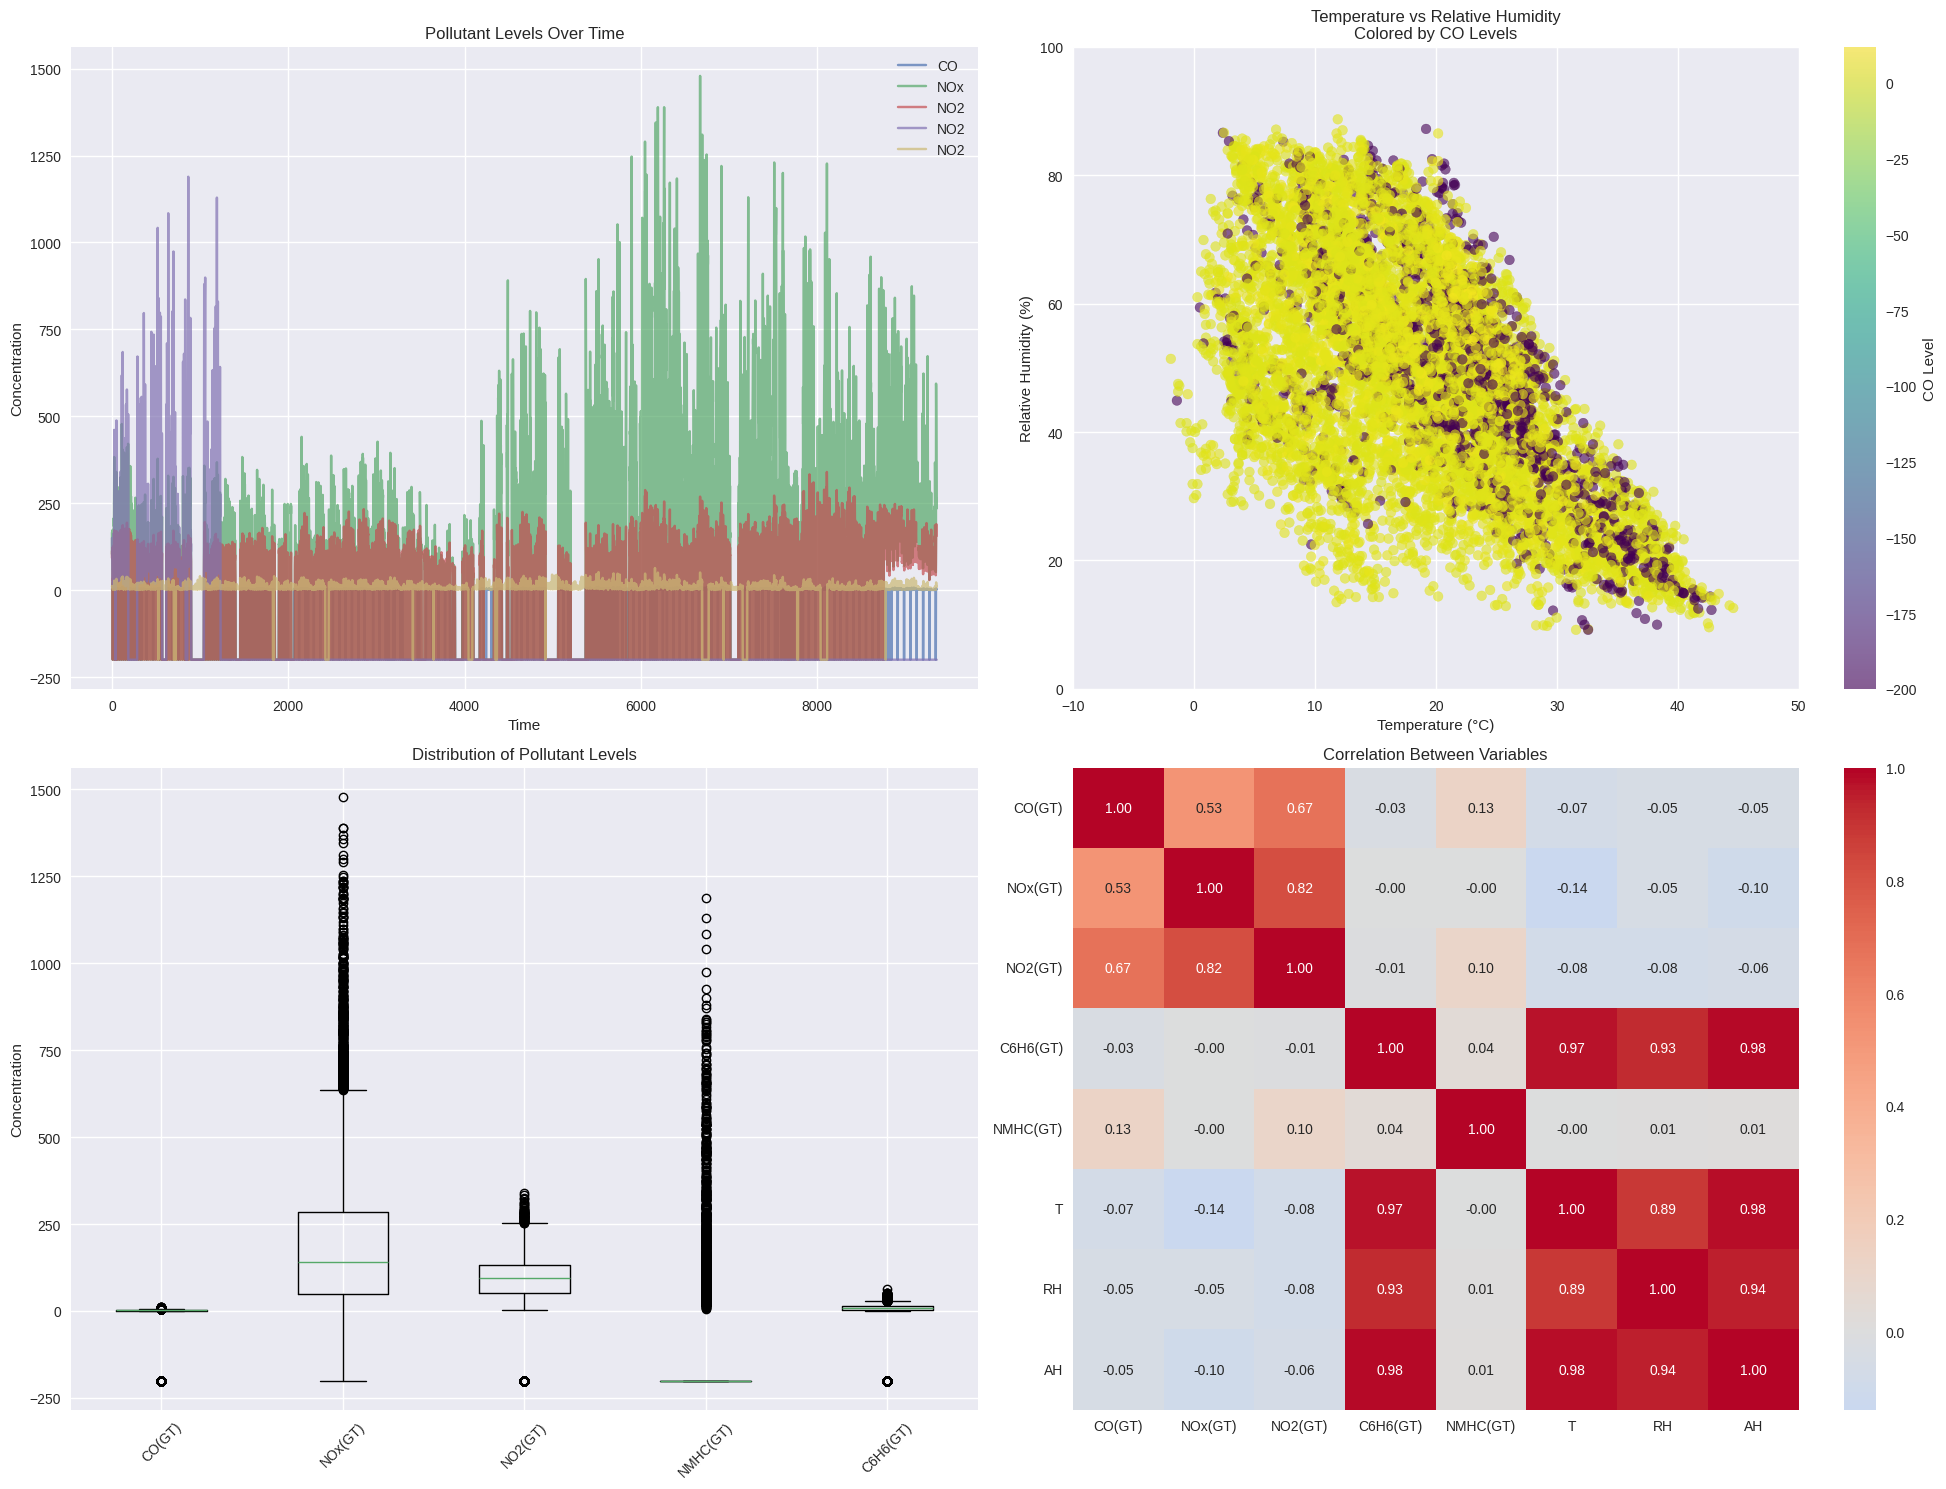

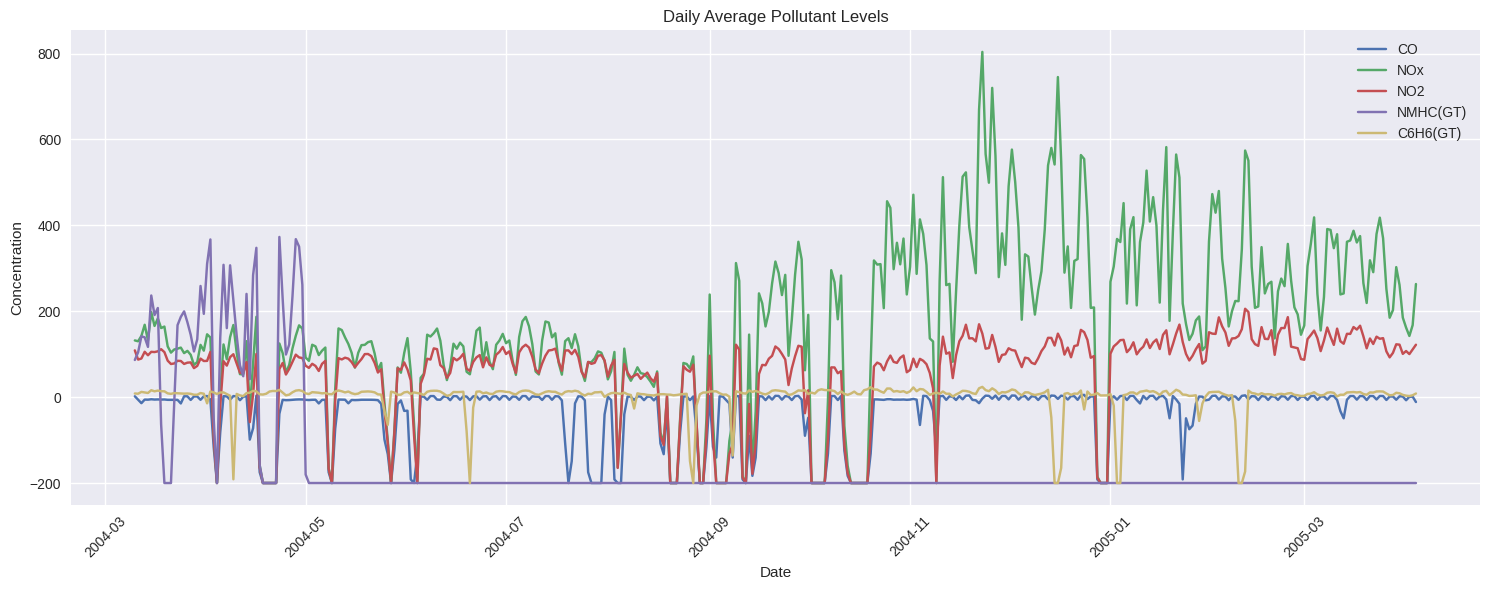


Summary Statistics:
            CO(GT)      NOx(GT)      NO2(GT)     NMHC(GT)     C6H6(GT)  \
count  9357.000000  9357.000000  9357.000000  9357.000000  9357.000000   
mean    -34.207524   168.616971    58.148873  -159.090093     1.865683   
std      77.657170   257.433866   126.940455   139.789093    41.380206   
min    -200.000000  -200.000000  -200.000000  -200.000000  -200.000000   
25%       0.600000    50.000000    53.000000  -200.000000     4.000000   
50%       1.500000   141.000000    96.000000  -200.000000     7.900000   
75%       2.600000   284.000000   133.000000  -200.000000    13.600000   
max      11.900000  1479.000000   340.000000  1189.000000    63.700000   

                 T           RH           AH  
count  9357.000000  9357.000000  9357.000000  
mean      9.778305    39.485380    -6.837604  
std      43.203623    51.216145    38.976670  
min    -200.000000  -200.000000  -200.000000  
25%      10.900000    34.100000     0.692300  
50%      17.200000    48.60000

In [47]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

# Read the data
# X = pd.read_csv('X.csv')  # Uncomment this line when using actual data

# Create a figure with subplots
plt.style.use('seaborn-v0_8')
fig = plt.figure(figsize=(20, 15))

# 1. Time series plot of pollutants
plt.subplot(2, 2, 1)
plt.plot(X['CO(GT)'], label='CO', alpha=0.7)
plt.plot(X['NOx(GT)'], label='NOx', alpha=0.7)
plt.plot(X['NO2(GT)'], label='NO2', alpha=0.7)
plt.plot(X['NMHC(GT)'], label='NO2', alpha=0.7)
plt.plot(X['C6H6(GT)'], label='NO2', alpha=0.7)
plt.title('Pollutant Levels Over Time')
plt.xlabel('Time')
plt.ylabel('Concentration')
plt.legend()
plt.grid(True)

# 2. Temperature vs Humidity scatter plot with pollutant levels
plt.subplot(2, 2, 2)
scatter = plt.scatter(X['T'], X['RH'], 
                     c=X['CO(GT)'], 
                     cmap='viridis', 
                     alpha=0.6)
plt.xlim(-10, 50)  # Set temperature range from -10 to 50°C
plt.ylim(0, 100)  # Set temperature range from -10 to 50°C
plt.colorbar(scatter, label='CO Level')
plt.title('Temperature vs Relative Humidity\nColored by CO Levels')
plt.xlabel('Temperature (°C)')
plt.ylabel('Relative Humidity (%)')

# 3. Box plots of pollutants
plt.subplot(2, 2, 3)
pollutants = X[['CO(GT)', 'NOx(GT)', 'NO2(GT)','NMHC(GT)','C6H6(GT)']]
plt.boxplot([pollutants[col] for col in pollutants.columns], 
            labels=pollutants.columns)
plt.title('Distribution of Pollutant Levels')
plt.ylabel('Concentration')
plt.xticks(rotation=45)

# 4. Correlation heatmap
plt.subplot(2, 2, 4)
correlation_matrix = X[['CO(GT)', 'NOx(GT)', 'NO2(GT)','C6H6(GT)','NMHC(GT)', 
                                'T', 'RH', 'AH']].corr()
sns.heatmap(correlation_matrix, 
            annot=True, 
            cmap='coolwarm', 
            center=0,
            fmt='.2f')
plt.title('Correlation Between Variables')

# Adjust layout and display
plt.tight_layout()
plt.show()

# Additional analysis: Daily averages
# Convert Date and Time columns to datetime
X['datetime'] = pd.to_datetime(X['Date'] + ' ' + X['Time'])
daily_avg = X.groupby(X['datetime'].dt.date).agg({
    'CO(GT)': 'mean',
    'NOx(GT)': 'mean',
    'NO2(GT)': 'mean',
    'NMHC(GT)': 'mean',
    'C6H6(GT)': 'mean',
    'T': 'mean',
    'RH': 'mean'
}).reset_index()

# Plot daily averages
plt.figure(figsize=(15, 6))
plt.plot(daily_avg['datetime'], daily_avg['CO(GT)'], label='CO')
plt.plot(daily_avg['datetime'], daily_avg['NOx(GT)'], label='NOx')
plt.plot(daily_avg['datetime'], daily_avg['NO2(GT)'], label='NO2')
plt.plot(daily_avg['datetime'], daily_avg['NMHC(GT)'], label='NMHC(GT)')
plt.plot(daily_avg['datetime'], daily_avg['C6H6(GT)'], label='C6H6(GT)')
plt.title('Daily Average Pollutant Levels')
plt.xlabel('Date')
plt.ylabel('Concentration')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Print summary statistics
print("\nSummary Statistics:")
print(X[['CO(GT)', 'NOx(GT)', 'NO2(GT)','NMHC(GT)','C6H6(GT)', 'T', 'RH', 'AH']].describe())

we need to treat the data with -200 values which corresponds to missing values. More than 90% of rows have missing values so we can't drop them as we would lose to much information, I don't think replacing them by the mean of median should be a good idea as the variation of the data is high, it would definitly change or even corrupt to much the data and the prediction that follows. So I would rather replace them with nan values even if that means having discountinuing data. Just for the example let's show below the analysis results if we remove rows with missing values with only 827 rows remaining


Number of non-NaN values for each pollutant:
CO(GT)      827
NOx(GT)     827
NO2(GT)     827
NMHC(GT)    827
C6H6(GT)    827
dtype: int64


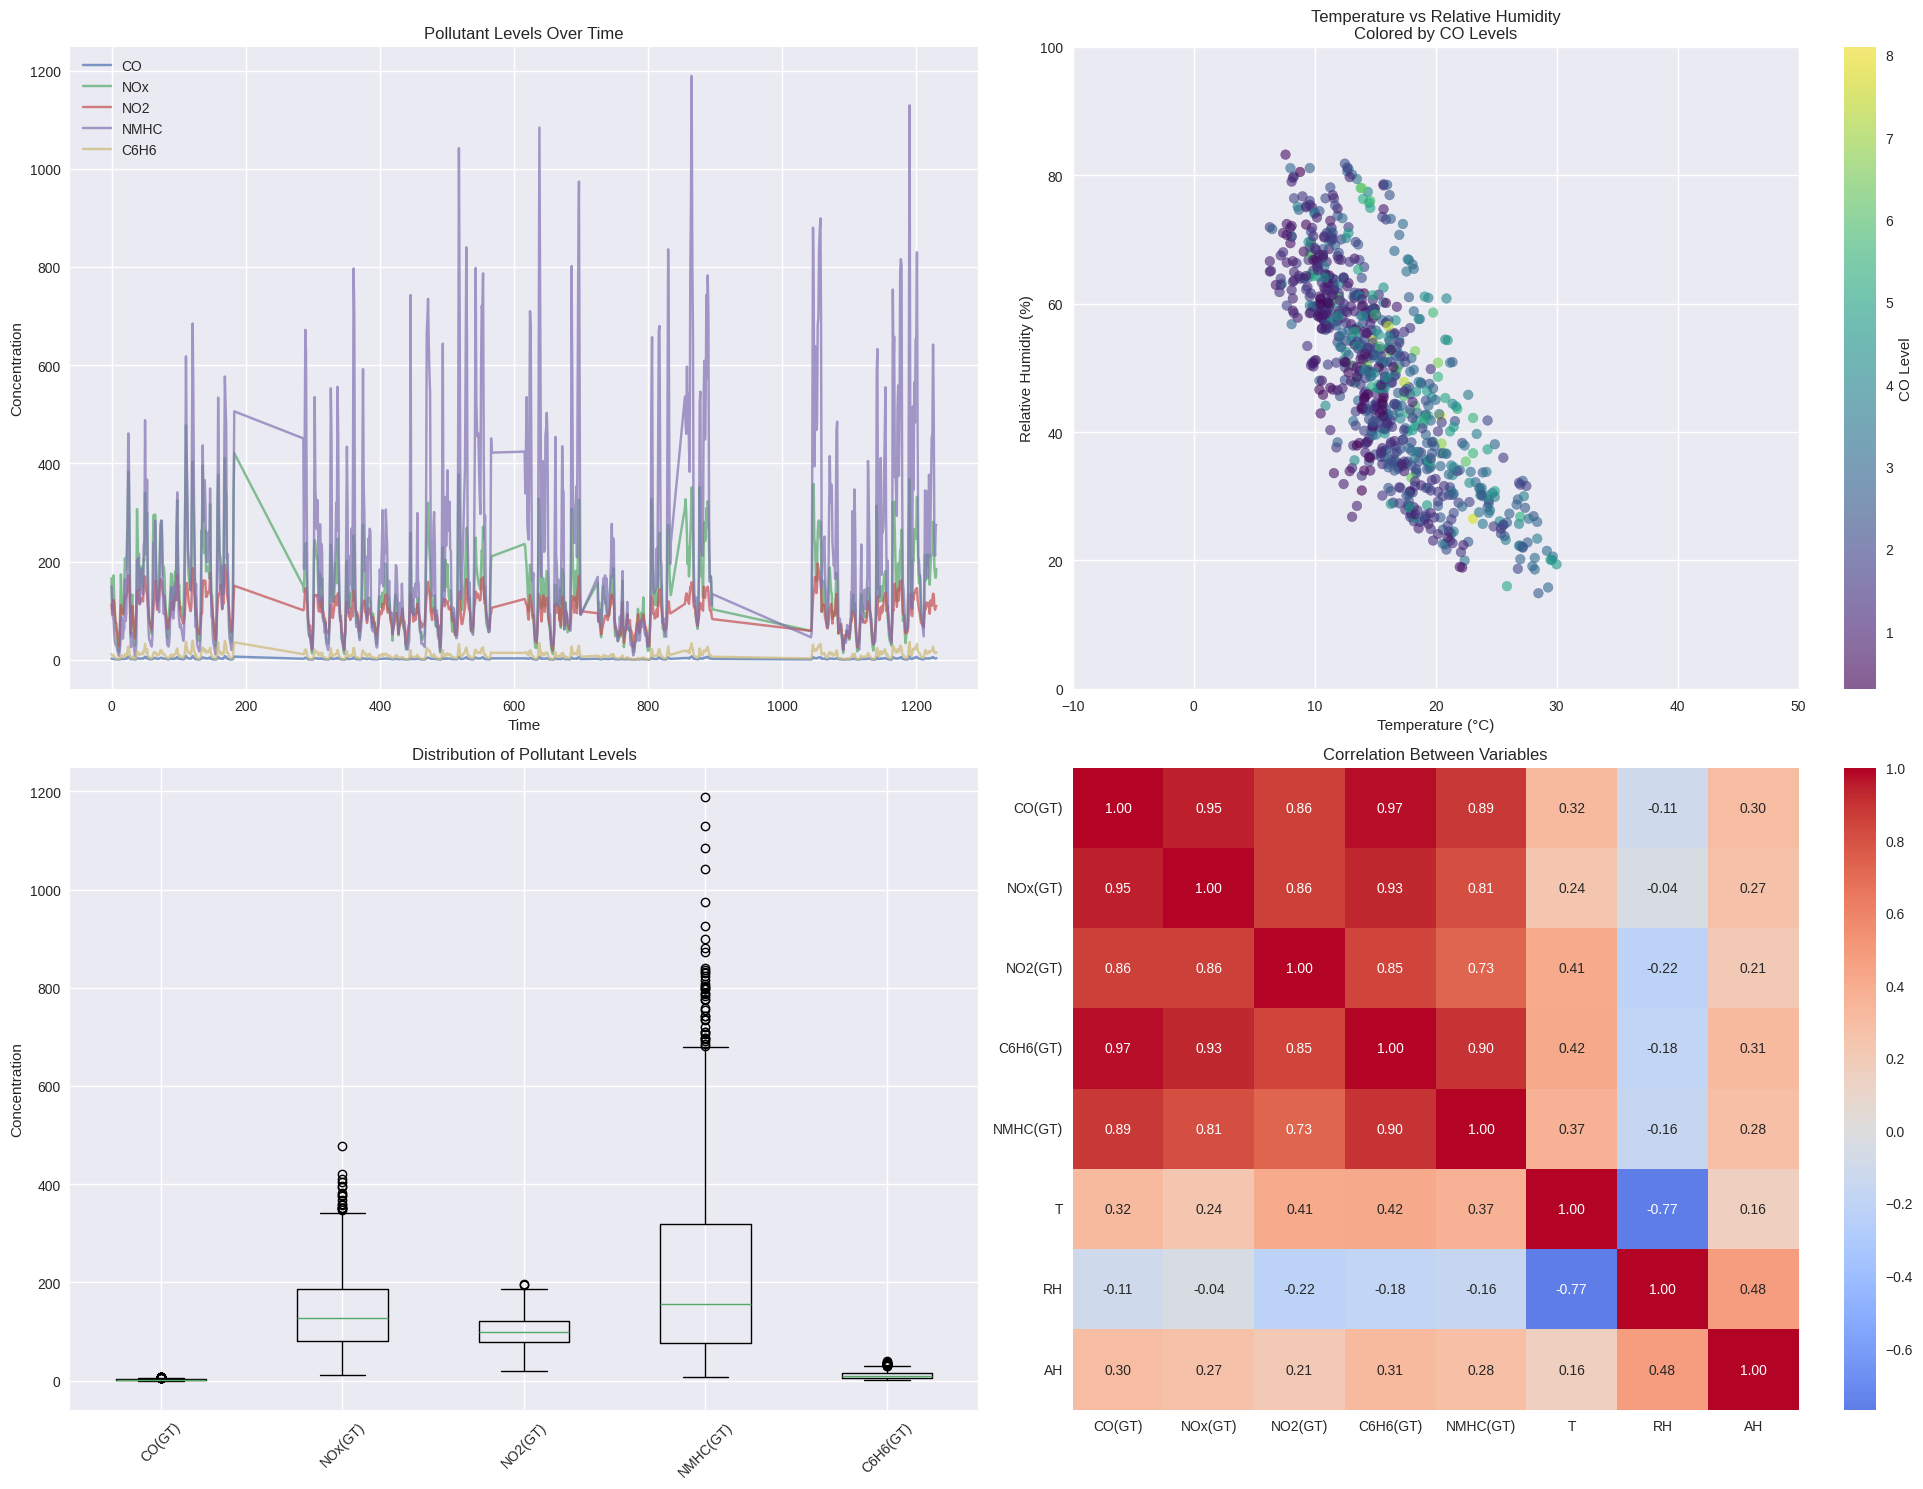

/tmp/ipykernel_160730/3609727311.py:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_no_missing_2['datetime'] = pd.to_datetime(X_no_missing_2['Date'] + ' ' + X_no_missing_2['Time'])


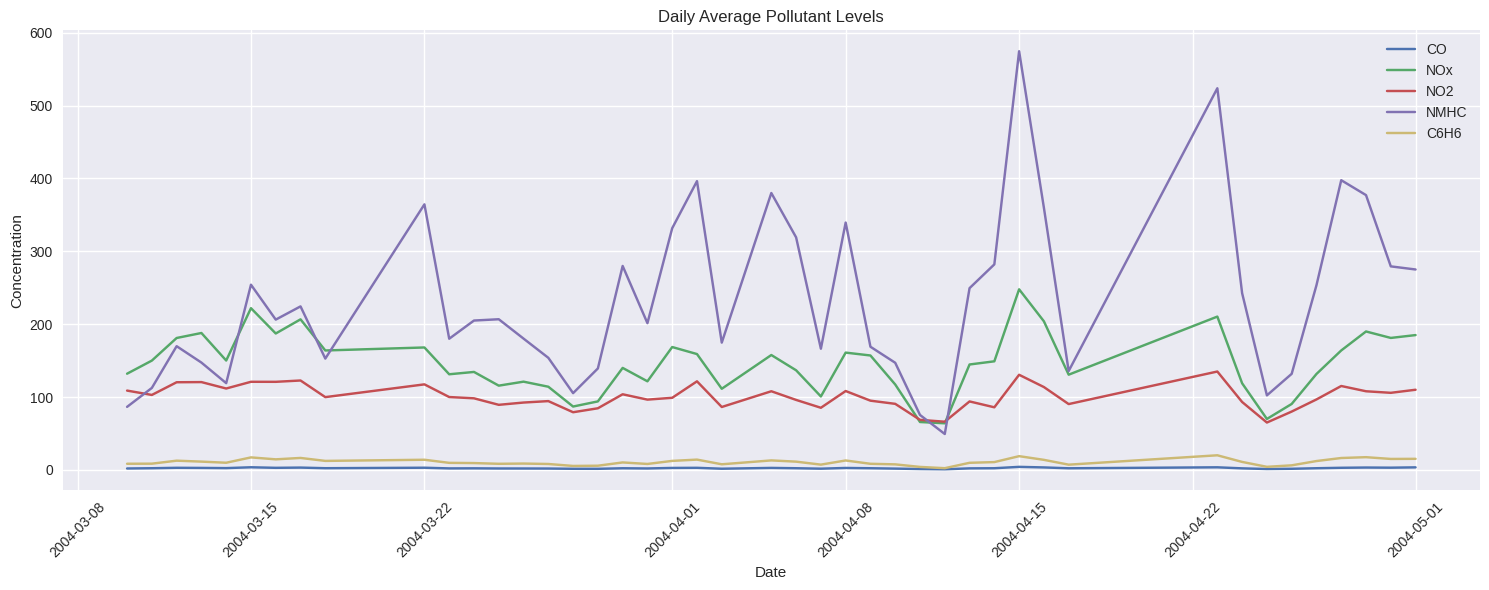


Summary Statistics:
           CO(GT)     NOx(GT)     NO2(GT)     NMHC(GT)    C6H6(GT)  \
count  827.000000  827.000000  827.000000   827.000000  827.000000   
mean     2.353567  143.501814  100.259976   231.025393   10.771100   
std      1.409496   81.829717   31.493823   208.461912    7.418134   
min      0.300000   12.000000   19.000000     7.000000    0.500000   
25%      1.300000   81.000000   78.500000    77.000000    4.800000   
50%      2.000000  128.000000   99.000000   157.000000    9.100000   
75%      3.100000  187.000000  122.000000   318.500000   14.800000   
max      8.100000  478.000000  196.000000  1189.000000   39.200000   

                T          RH          AH  
count  827.000000  827.000000  827.000000  
mean    15.601451   49.050181    0.831853  
std      4.825304   15.266746    0.178506  
min      6.300000   14.900000    0.402300  
25%     11.900000   36.700000    0.718950  
50%     15.000000   49.600000    0.817700  
75%     18.300000   60.550000    0.92750

In [50]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import numpy as np

# Create a figure with subplots
plt.style.use('seaborn-v0_8')
fig = plt.figure(figsize=(20, 15))

# 1. Time series plot of pollutants - Fixed labels
plt.subplot(2, 2, 1)
plt.plot(X_no_missing_2['CO(GT)'], label='CO', alpha=0.7)
plt.plot(X_no_missing_2['NOx(GT)'], label='NOx', alpha=0.7)
plt.plot(X_no_missing_2['NO2(GT)'], label='NO2', alpha=0.7)
plt.plot(X_no_missing_2['NMHC(GT)'], label='NMHC', alpha=0.7)  # Fixed label
plt.plot(X_no_missing_2['C6H6(GT)'], label='C6H6', alpha=0.7)  # Fixed label
plt.title('Pollutant Levels Over Time')
plt.xlabel('Time')
plt.ylabel('Concentration')
plt.legend()
plt.grid(True)

# 2. Temperature vs Humidity scatter plot with pollutant levels
plt.subplot(2, 2, 2)
scatter = plt.scatter(X_no_missing_2['T'], X_no_missing_2['RH'], 
                     c=X_no_missing_2['CO(GT)'], 
                     cmap='viridis', 
                     alpha=0.6)
plt.xlim(-10, 50)
plt.ylim(0, 100)
plt.colorbar(scatter, label='CO Level')
plt.title('Temperature vs Relative Humidity\nColored by CO Levels')
plt.xlabel('Temperature (°C)')
plt.ylabel('Relative Humidity (%)')

# 3. Box plots of pollutants - Modified to handle NaN values
plt.subplot(2, 2, 3)
pollutants = X_no_missing_2[['CO(GT)', 'NOx(GT)', 'NO2(GT)','NMHC(GT)','C6H6(GT)']]
# Drop NaN values for each column separately
data_to_plot = [pollutants[col].dropna() for col in pollutants.columns]
plt.boxplot(data_to_plot, labels=pollutants.columns)
plt.title('Distribution of Pollutant Levels')
plt.ylabel('Concentration')
plt.xticks(rotation=45)

# Print the number of non-NaN values for each pollutant
print("\nNumber of non-NaN values for each pollutant:")
print(pollutants.count())

# 4. Correlation heatmap - Using only complete observations
plt.subplot(2, 2, 4)
correlation_matrix = X_no_missing_2[['CO(GT)', 'NOx(GT)', 'NO2(GT)','C6H6(GT)','NMHC(GT)', 
                                'T', 'RH', 'AH']].corr()
sns.heatmap(correlation_matrix, 
            annot=True, 
            cmap='coolwarm', 
            center=0,
            fmt='.2f')
plt.title('Correlation Between Variables')

# Adjust layout and display
plt.tight_layout()
plt.show()

# Additional analysis: Daily averages
# Convert Date and Time columns to datetime
X_no_missing_2['datetime'] = pd.to_datetime(X_no_missing_2['Date'] + ' ' + X_no_missing_2['Time'])
daily_avg = X_no_missing_2.groupby(X_no_missing_2['datetime'].dt.date).agg({
    'CO(GT)': 'mean',
    'NOx(GT)': 'mean',
    'NO2(GT)': 'mean',
    'NMHC(GT)': 'mean',
    'C6H6(GT)': 'mean',
    'T': 'mean',
    'RH': 'mean'
}).reset_index()

# Plot daily averages
plt.figure(figsize=(15, 6))
plt.plot(daily_avg['datetime'], daily_avg['CO(GT)'], label='CO')
plt.plot(daily_avg['datetime'], daily_avg['NOx(GT)'], label='NOx')
plt.plot(daily_avg['datetime'], daily_avg['NO2(GT)'], label='NO2')
plt.plot(daily_avg['datetime'], daily_avg['NMHC(GT)'], label='NMHC')  # Fixed label
plt.plot(daily_avg['datetime'], daily_avg['C6H6(GT)'], label='C6H6')  # Fixed label
plt.title('Daily Average Pollutant Levels')
plt.xlabel('Date')
plt.ylabel('Concentration')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Print summary statistics
print("\nSummary Statistics:")
print(X_no_missing_2[['CO(GT)', 'NOx(GT)', 'NO2(GT)','NMHC(GT)','C6H6(GT)', 'T', 'RH', 'AH']].describe())

We lost to much information particurlaly for the most extreme temperatures

Let's just replace them with NaN values and see


Number of non-NaN values for each pollutant:
CO(GT)      7674
NOx(GT)     7718
NO2(GT)     7715
NMHC(GT)     914
C6H6(GT)    8991
dtype: int64


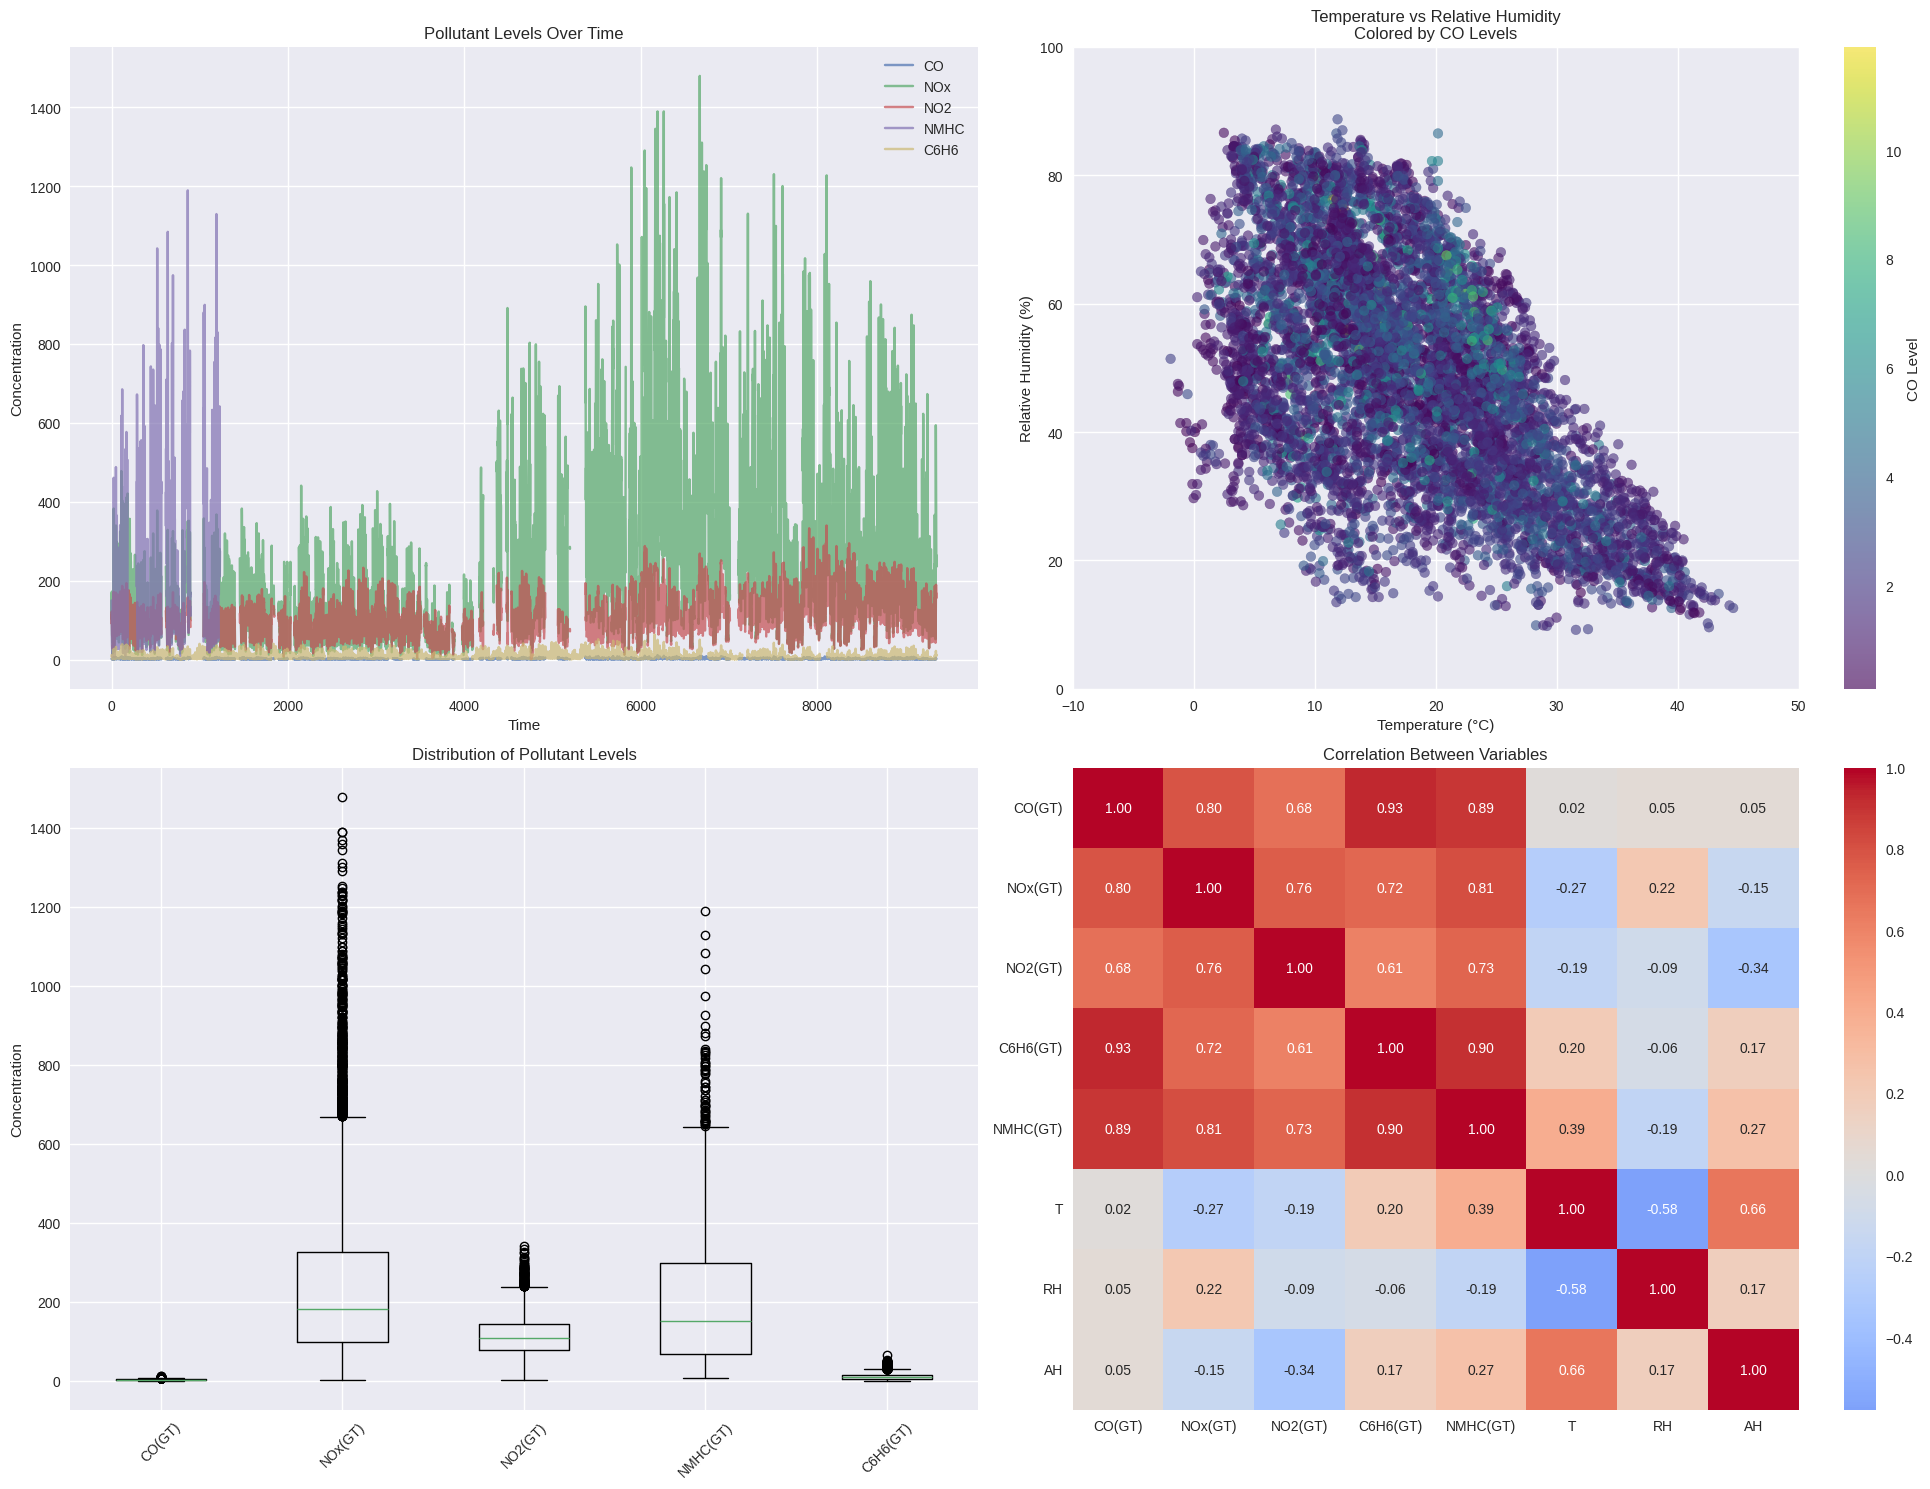

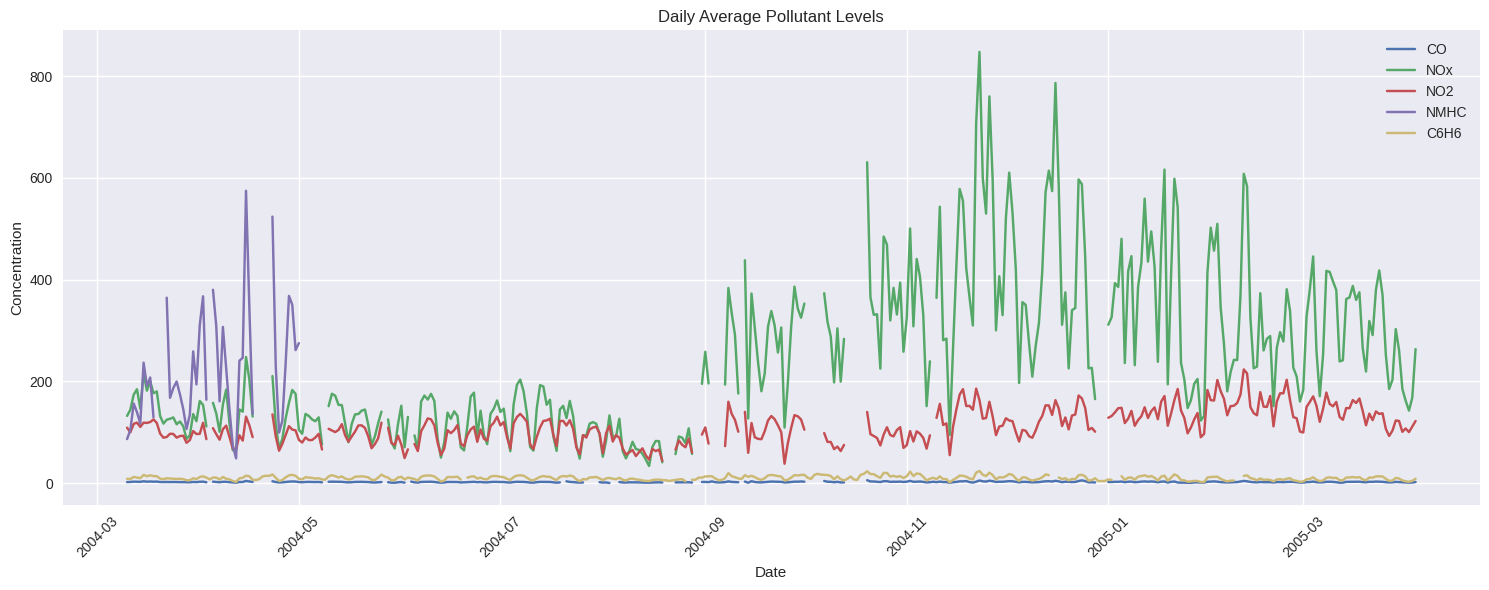


Summary Statistics:
            CO(GT)      NOx(GT)      NO2(GT)     NMHC(GT)     C6H6(GT)  \
count  7674.000000  7718.000000  7715.000000   914.000000  8991.000000   
mean      2.152750   246.896735   113.091251   218.811816    10.083105   
std       1.453252   212.979168    48.370108   204.459921     7.449820   
min       0.100000     2.000000     2.000000     7.000000     0.100000   
25%       1.100000    98.000000    78.000000    67.000000     4.400000   
50%       1.800000   180.000000   109.000000   150.000000     8.200000   
75%       2.900000   326.000000   142.000000   297.000000    14.000000   
max      11.900000  1479.000000   340.000000  1189.000000    63.700000   

                 T           RH           AH  
count  8991.000000  8991.000000  8991.000000  
mean     18.317829    49.234201     1.025530  
std       8.832116    17.316892     0.403813  
min      -1.900000     9.200000     0.184700  
25%      11.800000    35.800000     0.736800  
50%      17.800000    49.60000

In [48]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import numpy as np

# Create a figure with subplots
plt.style.use('seaborn-v0_8')
fig = plt.figure(figsize=(20, 15))

# 1. Time series plot of pollutants - Fixed labels
plt.subplot(2, 2, 1)
plt.plot(X_clean['CO(GT)'], label='CO', alpha=0.7)
plt.plot(X_clean['NOx(GT)'], label='NOx', alpha=0.7)
plt.plot(X_clean['NO2(GT)'], label='NO2', alpha=0.7)
plt.plot(X_clean['NMHC(GT)'], label='NMHC', alpha=0.7)  # Fixed label
plt.plot(X_clean['C6H6(GT)'], label='C6H6', alpha=0.7)  # Fixed label
plt.title('Pollutant Levels Over Time')
plt.xlabel('Time')
plt.ylabel('Concentration')
plt.legend()
plt.grid(True)

# 2. Temperature vs Humidity scatter plot with pollutant levels
plt.subplot(2, 2, 2)
scatter = plt.scatter(X_clean['T'], X_clean['RH'], 
                     c=X_clean['CO(GT)'], 
                     cmap='viridis', 
                     alpha=0.6)
plt.xlim(-10, 50)
plt.ylim(0, 100)
plt.colorbar(scatter, label='CO Level')
plt.title('Temperature vs Relative Humidity\nColored by CO Levels')
plt.xlabel('Temperature (°C)')
plt.ylabel('Relative Humidity (%)')

# 3. Box plots of pollutants - Modified to handle NaN values
plt.subplot(2, 2, 3)
pollutants = X_clean[['CO(GT)', 'NOx(GT)', 'NO2(GT)','NMHC(GT)','C6H6(GT)']]
# Drop NaN values for each column separately
data_to_plot = [pollutants[col].dropna() for col in pollutants.columns]
plt.boxplot(data_to_plot, labels=pollutants.columns)
plt.title('Distribution of Pollutant Levels')
plt.ylabel('Concentration')
plt.xticks(rotation=45)

# Print the number of non-NaN values for each pollutant
print("\nNumber of non-NaN values for each pollutant:")
print(pollutants.count())

# 4. Correlation heatmap - Using only complete observations
plt.subplot(2, 2, 4)
correlation_matrix = X_clean[['CO(GT)', 'NOx(GT)', 'NO2(GT)','C6H6(GT)','NMHC(GT)', 
                                'T', 'RH', 'AH']].corr()
sns.heatmap(correlation_matrix, 
            annot=True, 
            cmap='coolwarm', 
            center=0,
            fmt='.2f')
plt.title('Correlation Between Variables')

# Adjust layout and display
plt.tight_layout()
plt.show()

# Additional analysis: Daily averages
# Convert Date and Time columns to datetime
X_clean['datetime'] = pd.to_datetime(X_clean['Date'] + ' ' + X_clean['Time'])
daily_avg = X_clean.groupby(X_clean['datetime'].dt.date).agg({
    'CO(GT)': 'mean',
    'NOx(GT)': 'mean',
    'NO2(GT)': 'mean',
    'NMHC(GT)': 'mean',
    'C6H6(GT)': 'mean',
    'T': 'mean',
    'RH': 'mean'
}).reset_index()

# Plot daily averages
plt.figure(figsize=(15, 6))
plt.plot(daily_avg['datetime'], daily_avg['CO(GT)'], label='CO')
plt.plot(daily_avg['datetime'], daily_avg['NOx(GT)'], label='NOx')
plt.plot(daily_avg['datetime'], daily_avg['NO2(GT)'], label='NO2')
plt.plot(daily_avg['datetime'], daily_avg['NMHC(GT)'], label='NMHC')  # Fixed label
plt.plot(daily_avg['datetime'], daily_avg['C6H6(GT)'], label='C6H6')  # Fixed label
plt.title('Daily Average Pollutant Levels')
plt.xlabel('Date')
plt.ylabel('Concentration')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Print summary statistics
print("\nSummary Statistics:")
print(X_clean[['CO(GT)', 'NOx(GT)', 'NO2(GT)','NMHC(GT)','C6H6(GT)', 'T', 'RH', 'AH']].describe())

The data is a bit discountinuing but the correlation between variables makes much more sense and we not lose data.

In [52]:
X_no_missing_2.head()

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,datetime
0,3/10/2004,18:00:00,2.6,1360,150,11.9,1046,166,1056,113,1692,1268,13.6,48.9,0.7578,2004-03-10 18:00:00
1,3/10/2004,19:00:00,2.0,1292,112,9.4,955,103,1174,92,1559,972,13.3,47.7,0.7255,2004-03-10 19:00:00
2,3/10/2004,20:00:00,2.2,1402,88,9.0,939,131,1140,114,1555,1074,11.9,54.0,0.7502,2004-03-10 20:00:00
3,3/10/2004,21:00:00,2.2,1376,80,9.2,948,172,1092,122,1584,1203,11.0,60.0,0.7867,2004-03-10 21:00:00
4,3/10/2004,22:00:00,1.6,1272,51,6.5,836,131,1205,116,1490,1110,11.2,59.6,0.7888,2004-03-10 22:00:00


One thing is missing for the data preparation, we have to convert the datetime

In [55]:
# Create a copy of the dataframe
X_final = X_no_missing_2.copy()

# Convert Date and Time separately with correct formats
X_final.loc[:, 'hour'] = pd.to_datetime(X_final['Time'], format='%H:%M:%S').dt.hour
X_final.loc[:, 'datetime'] = pd.to_datetime(X_final['Date'] + ' ' + X_final['Time'], format='%m/%d/%Y %H:%M:%S')

# Extract all time features
X_final.loc[:, 'day'] = X_final['datetime'].dt.day
X_final.loc[:, 'month'] = X_final['datetime'].dt.month
X_final.loc[:, 'year'] = X_final['datetime'].dt.year
X_final.loc[:, 'day_of_week'] = X_final['datetime'].dt.dayofweek # 0 = Monday, 6 = Sunday

# Create cyclical features,  cyclical encoding maintains the circular nature of time features (eg : hour 23 is close to hour 0)
X_final.loc[:, 'hour_sin'] = np.sin(2 * np.pi * X_final['hour']/24)
X_final.loc[:, 'hour_cos'] = np.cos(2 * np.pi * X_final['hour']/24)
X_final.loc[:, 'day_of_week_sin'] = np.sin(2 * np.pi * X_final['day_of_week']/7)
X_final.loc[:, 'day_of_week_cos'] = np.cos(2 * np.pi * X_final['day_of_week']/7) 

In [56]:
X_final.head()

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),...,datetime,hour,day,month,year,day_of_week,hour_sin,hour_cos,day_of_week_sin,day_of_week_cos
0,3/10/2004,18:00:00,2.6,1360,150,11.9,1046,166,1056,113,...,2004-03-10 18:00:00,18,10,3,2004,2,-1.000000,-1.836970e-16,0.974928,-0.222521
1,3/10/2004,19:00:00,2.0,1292,112,9.4,955,103,1174,92,...,2004-03-10 19:00:00,19,10,3,2004,2,-0.965926,2.588190e-01,0.974928,-0.222521
2,3/10/2004,20:00:00,2.2,1402,88,9.0,939,131,1140,114,...,2004-03-10 20:00:00,20,10,3,2004,2,-0.866025,5.000000e-01,0.974928,-0.222521
3,3/10/2004,21:00:00,2.2,1376,80,9.2,948,172,1092,122,...,2004-03-10 21:00:00,21,10,3,2004,2,-0.707107,7.071068e-01,0.974928,-0.222521
4,3/10/2004,22:00:00,1.6,1272,51,6.5,836,131,1205,116,...,2004-03-10 22:00:00,22,10,3,2004,2,-0.500000,8.660254e-01,0.974928,-0.222521


In [57]:
X_final = X_final.drop(['Date', 'Time', 'datetime'], axis=1)

In [58]:
X_final.head()

,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),...,AH,hour,day,month,year,day_of_week,hour_sin,hour_cos,day_of_week_sin,day_of_week_cos
0,2.6,1360,150,11.9,1046,166,1056,113,1692,1268,...,0.7578,18,10,3,2004,2,-1.000000,-1.836970e-16,0.974928,-0.222521
1,2.0,1292,112,9.4,955,103,1174,92,1559,972,...,0.7255,19,10,3,2004,2,-0.965926,2.588190e-01,0.974928,-0.222521
2,2.2,1402,88,9.0,939,131,1140,114,1555,1074,...,0.7502,20,10,3,2004,2,-0.866025,5.000000e-01,0.974928,-0.222521
3,2.2,1376,80,9.2,948,172,1092,122,1584,1203,...,0.7867,21,10,3,2004,2,-0.707107,7.071068e-01,0.974928,-0.222521
4,1.6,1272,51,6.5,836,131,1205,116,1490,1110,...,0.7888,22,10,3,2004,2,-0.500000,8.660254e-01,0.974928,-0.222521
